In [108]:
import pandas as pd
import seaborn as sns

df = pd.read_csv(r'https://raw.githubusercontent.com/CodyDong/schulich_data_science/main/midterm_data.csv')

Q1 Customer who completely check out on average spent 31 mins browsing compare to 22 mins to customers who tend not to check out. Minimum time spent by customer who checked out is 25 mins while compare to customer who don't. As people with age 60 plus be their primary clients they tend to have more items then others. Comparing between people who checked out or not, average item in their cart are around 7 and 5. Which shows that, the more time customer stay on the platform, the more item they would choose to put to cart, then a high probability they would check out for those who are above age 60. While the value in their cart for customer who use desktop to browse tend be more and stable, tablet user's cart value variates between ages.

Q2: As we see in the dataset, only device and location have missing datas. Out of 3 types of devices, Desktop users are almost 50% of the data size, therefore missing values of device are replaced with Desktop. While location distribution within dataset are relative equal and only 30 out of 5000 data are missing, to avoid impact on the result, they are being removed.
As age variants between 18 to 65, it is feature engineered to be a new column called age_cat, which categorize age as below 20, each 10years above 20 as a new category and finally age above 60. And a new column named item_value is created inorder to compare the difference of average value per item between customers who check out and who does not.
A outlier in time spent and a couple in cart values were identified and removed.


Q3 Half of their clients are people with 60 plus years age and their major revenue also came from this group of people. Majority of the sales were made through desktop which suggested that the platform is currently suitable for customers whos older. If they tends to increase the amount of completely checked out, they should begin targeting yonger group customer which between 20~ 49 which first, has more buying power, second tend to use online shopping platform more frequent. Since they have very small segament of customer under 20 who visit and purchase, after involving items that target younger customers and actively promote the platform for young and middle-aged people. 
The focus is to expand the audience, introduce more products suitable for all ages, and try to create more discounts on tablets and mobile phones to increase the revenue brought by different platforms.

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           5000 non-null   int64  
 1   age              5000 non-null   int64  
 2   sessions         5000 non-null   int64  
 3   time_spent       5000 non-null   float64
 4   pages_visited    5000 non-null   int64  
 5   cart_items       5000 non-null   int64  
 6   cart_value       5000 non-null   float64
 7   checkout_status  5000 non-null   int64  
 8   device           4900 non-null   object 
 9   location         4970 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 390.8+ KB


In [110]:
df.describe(include = 'all')

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4900,4970
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Desktop,Location 4
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2538,1056
mean,2500.500000,41.538200,5.027200,25.158496,5.774400,14.966400,149.443146,0.272400,NaN,NaN
std,1443.520003,14.042734,2.594958,9.825536,2.570842,6.046336,68.711683,0.445239,NaN,NaN
min,1.000000,18.000000,1.000000,1.000000,1.000000,5.000000,20.410000,0.000000,NaN,NaN
25%,1250.750000,29.000000,3.000000,18.268862,4.000000,10.000000,92.482500,0.000000,NaN,NaN
50%,2500.500000,42.000000,5.000000,25.035361,6.000000,15.000000,143.440000,0.000000,NaN,NaN
75%,3750.250000,54.000000,7.000000,32.000361,8.000000,20.000000,198.380000,1.000000,NaN,NaN


In [111]:
df[df['device'].isnull() & df['location'].isnull()]

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
2130,2131,20,5,21.841304,6,19,243.39,0,NaN,NaN


<Axes: xlabel='device', ylabel='Count'>

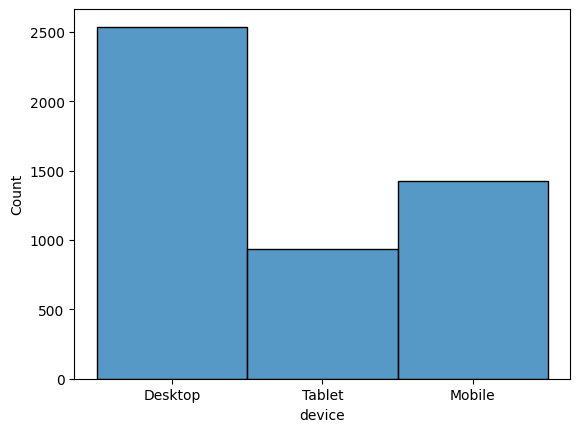

In [112]:
sns.histplot(df['device'])

<Axes: xlabel='location', ylabel='Count'>

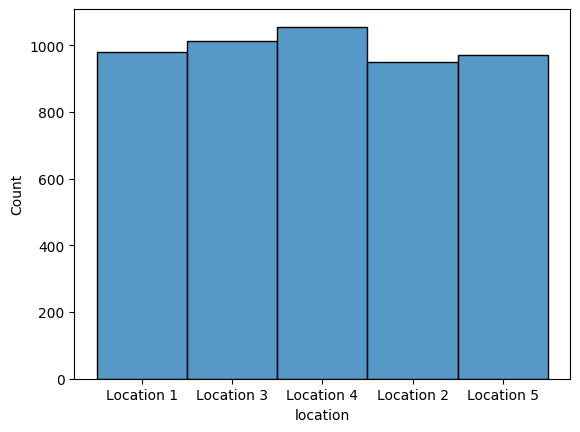

In [113]:
sns.histplot(df['location'])

In [114]:
df['device'] = df['device'].fillna('Desktop')

In [115]:
df.describe(include='all')

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000,4970
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Desktop,Location 4
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2638,1056
mean,2500.500000,41.538200,5.027200,25.158496,5.774400,14.966400,149.443146,0.272400,NaN,NaN
std,1443.520003,14.042734,2.594958,9.825536,2.570842,6.046336,68.711683,0.445239,NaN,NaN
min,1.000000,18.000000,1.000000,1.000000,1.000000,5.000000,20.410000,0.000000,NaN,NaN
25%,1250.750000,29.000000,3.000000,18.268862,4.000000,10.000000,92.482500,0.000000,NaN,NaN
50%,2500.500000,42.000000,5.000000,25.035361,6.000000,15.000000,143.440000,0.000000,NaN,NaN
75%,3750.250000,54.000000,7.000000,32.000361,8.000000,20.000000,198.380000,1.000000,NaN,NaN


In [116]:
df.dropna(subset=['location'], axis=0, inplace=True)

In [117]:
df.describe(include ='all')

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
count,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970,4970
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Desktop,Location 4
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2621,1056
mean,2501.426962,41.527968,5.023541,25.164647,5.775453,14.966398,149.409469,0.272435,NaN,NaN
std,1444.472898,14.045327,2.595267,9.831604,2.570848,6.054748,68.802068,0.445257,NaN,NaN
min,1.000000,18.000000,1.000000,1.000000,1.000000,5.000000,20.410000,0.000000,NaN,NaN
25%,1250.250000,29.000000,3.000000,18.270779,4.000000,10.000000,92.375000,0.000000,NaN,NaN
50%,2502.500000,42.000000,5.000000,25.042251,6.000000,15.000000,143.155000,0.000000,NaN,NaN
75%,3752.750000,54.000000,7.000000,32.014995,8.000000,20.000000,198.400000,1.000000,NaN,NaN


In [118]:
df.drop_duplicates(inplace=True)

In [119]:
df.describe()

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status
count,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000
mean,2501.426962,41.527968,5.023541,25.164647,5.775453,14.966398,149.409469,0.272435
std,1444.472898,14.045327,2.595267,9.831604,2.570848,6.054748,68.802068,0.445257
min,1.000000,18.000000,1.000000,1.000000,1.000000,5.000000,20.410000,0.000000
25%,1250.250000,29.000000,3.000000,18.270779,4.000000,10.000000,92.375000,0.000000
50%,2502.500000,42.000000,5.000000,25.042251,6.000000,15.000000,143.155000,0.000000
75%,3752.750000,54.000000,7.000000,32.014995,8.000000,20.000000,198.400000,1.000000
max,5000.000000,65.000000,9.000000,90.000000,12.000000,25.000000,427.400000,1.000000


Locate outliers using boxplot

<Axes: ylabel='time_spent'>

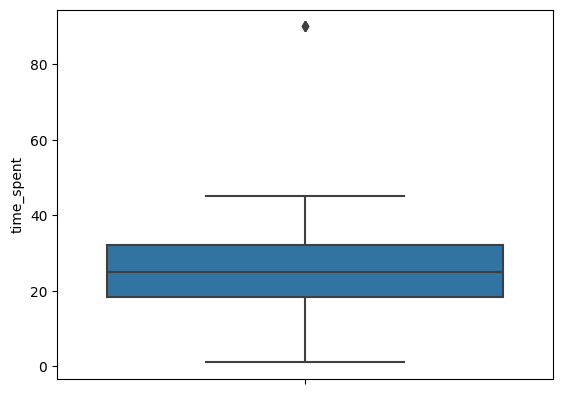

In [120]:
sns.boxplot(data=df,y='time_spent')

In [121]:
drop_price_outliers = df[df['time_spent']>60].index
df.drop(drop_price_outliers, inplace=True)

<Axes: ylabel='pages_visited'>

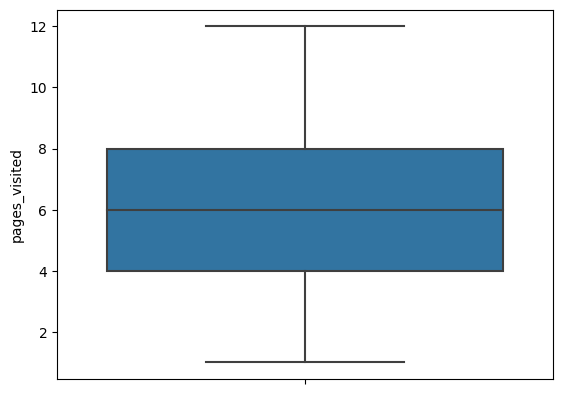

In [122]:
sns.boxplot(data=df,y='pages_visited')

<Axes: ylabel='cart_value'>

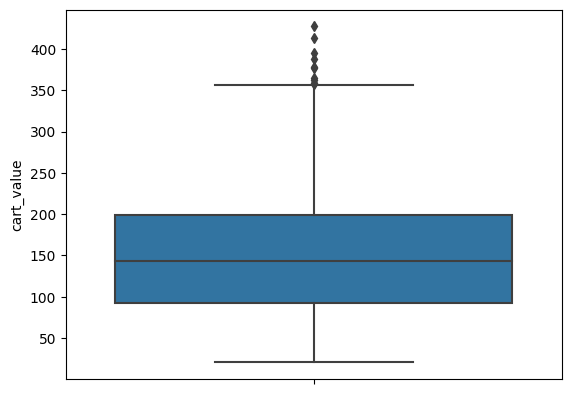

In [123]:
sns.boxplot(data=df,y='cart_value')

In [124]:
drop_price_outliers2 = df[df['cart_value']>350].index
drop_price_outliers2
df.drop(drop_price_outliers2, inplace=True)

In [125]:
def age_group(x):
    if x >= 0 and x < 20:
        return '0-19'
    elif x >= 20 and x < 30:
        return '20-29'
    elif x >= 30 and x < 40:
        return '30-39'
    elif x >= 40 and x < 50:
        return '40-49'
    elif x >= 20 and x < 40:
        return '50-59'
    else:
        return '60+'

In [126]:
df['age_cat']= df['age'].apply(age_group)

In [127]:
df['item_value'] = df['cart_value']/df['cart_items']

<Axes: xlabel='age_cat', ylabel='Count'>

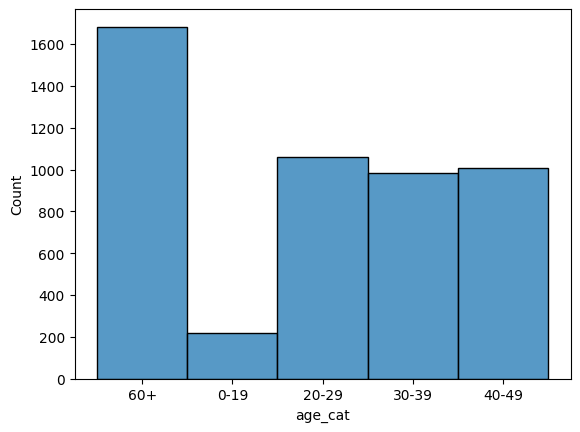

In [128]:
sns.histplot(df['age_cat'])

In [129]:
df.head()

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location,age_cat,item_value
0,1,62,3,13.295129,2,20,199.21,0,Desktop,Location 1,60+,9.960500
1,2,65,2,21.686405,3,21,294.82,0,Desktop,Location 3,60+,14.039048
2,3,18,7,17.135220,4,23,240.87,0,Desktop,Location 4,0-19,10.472609
3,4,21,9,29.589311,8,16,183.78,1,Desktop,Location 2,20-29,11.486250
4,5,21,3,25.948584,4,10,59.51,1,Tablet,Location 4,20-29,5.951000


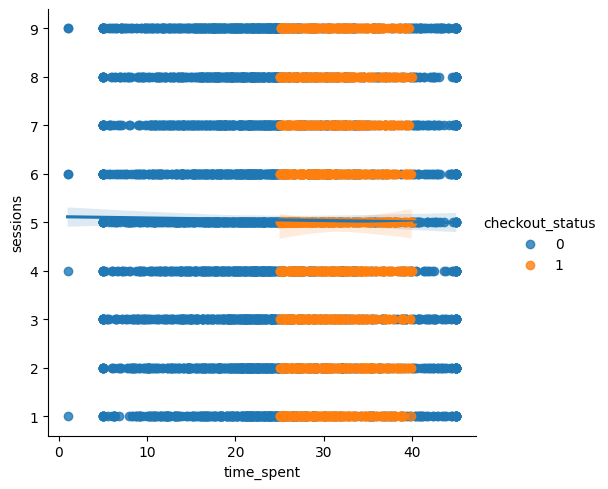

In [130]:
sns.lmplot(x='time_spent',y='sessions',data=df, hue ='checkout_status')

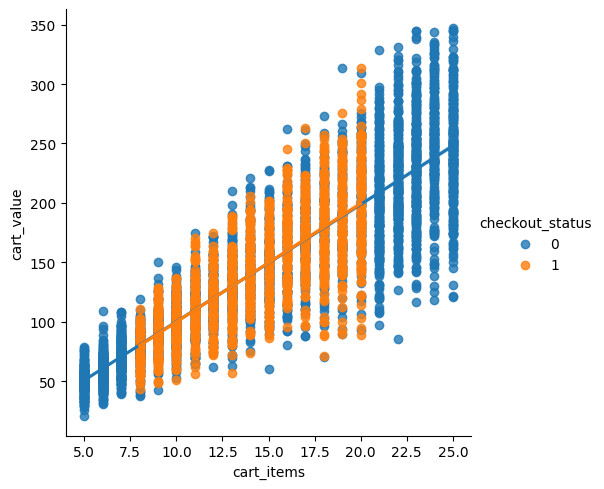

In [131]:
sns.lmplot(x='cart_items',y='cart_value',data=df, hue ='checkout_status')

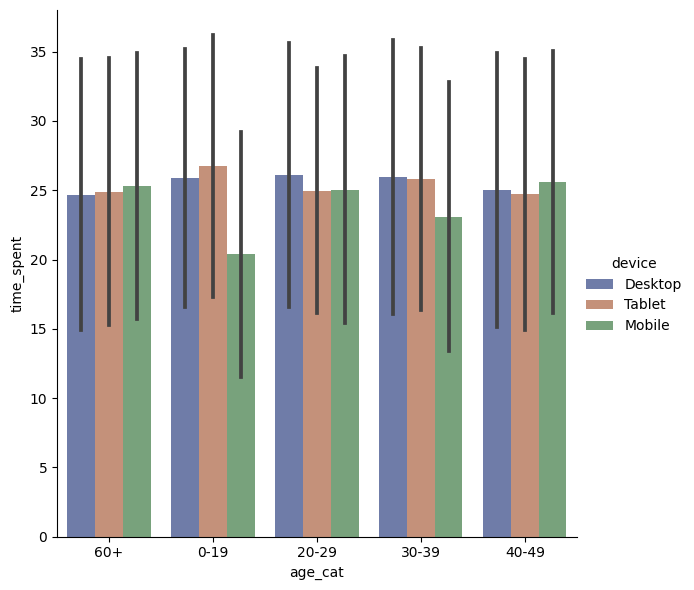

In [155]:
sns.catplot(
    data=df, kind="bar",
    x="age_cat", y="time_spent", hue="device",
    errorbar="sd", palette="dark", alpha=.6, height=6
)

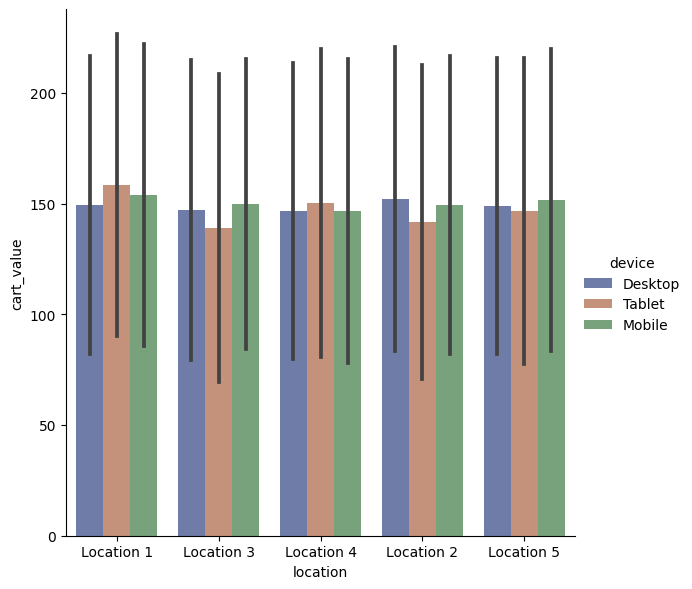

In [132]:
sns.catplot(
    data=df, kind="bar",
    x="location", y="cart_value", hue="device",
    errorbar="sd", palette="dark", alpha=.6, height=6
)

<Axes: xlabel='age', ylabel='time_spent'>

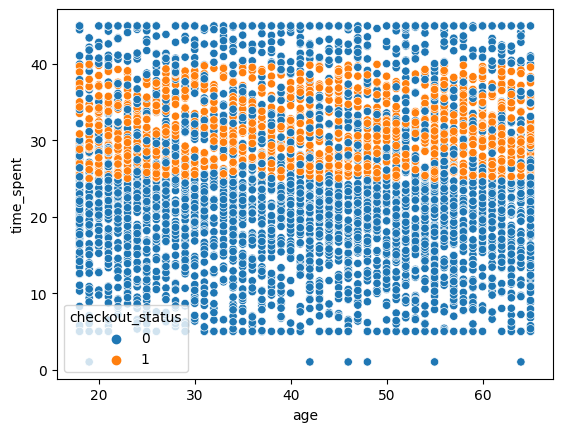

In [150]:
sns.scatterplot(x='age',y='time_spent',data =df,hue='checkout_status')

<Axes: xlabel='age_cat', ylabel='cart_value'>

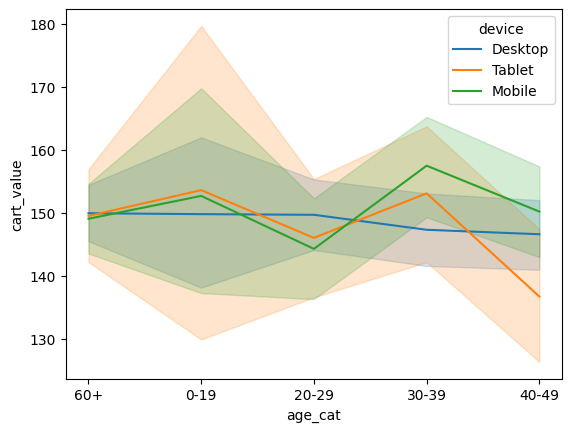

In [168]:
sns.lineplot(x="age_cat", y="cart_value",
             hue="device",data=df)

<Axes: xlabel='age_cat'>

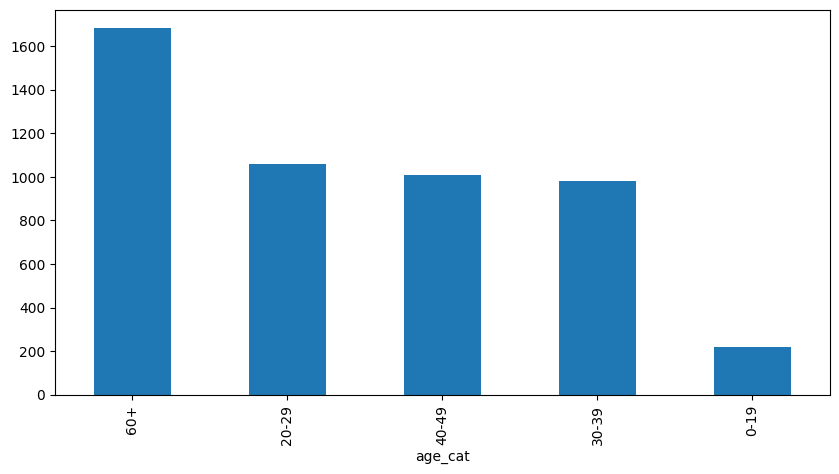

In [152]:
df.groupby('age_cat')['time_spent'].count().sort_values(ascending=False).plot(kind='bar', figsize=(10,5))

Split dataset into two seprate dateset by customer who checked out or not.

In [133]:
df_check1 = df[df['checkout_status']==1]
df_check0 = df[df['checkout_status']==0]

In [134]:
df_check1.describe(include ='all')

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location,age_cat,item_value
count,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.0,1354,1354,1354,1354.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5,5,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Desktop,Location 4,60+,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,742,300,454,NaN
mean,2468.948301,41.280650,4.940916,31.327974,7.289513,14.115214,140.725886,1.0,NaN,NaN,NaN,9.962680
std,1448.186237,14.235932,2.566668,4.180159,1.504001,3.734740,47.669413,0.0,NaN,NaN,NaN,2.008576
min,4.000000,18.000000,1.000000,25.000659,2.000000,8.000000,43.220000,1.0,NaN,NaN,NaN,3.928889
25%,1196.750000,28.000000,3.000000,27.609409,6.000000,11.000000,103.117500,1.0,NaN,NaN,NaN,8.552929
50%,2491.500000,41.000000,5.000000,30.949485,7.000000,14.000000,136.180000,1.0,NaN,NaN,NaN,9.969129
75%,3686.250000,54.000000,7.000000,34.567006,8.000000,17.000000,174.375000,1.0,NaN,NaN,NaN,11.332469


In [135]:
df_check0.describe(include='all')

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location,age_cat,item_value
count,3598.000000,3598.000000,3598.000000,3598.000000,3598.000000,3598.000000,3598.000000,3598.0,3598,3598,3598,3598.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5,5,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Desktop,Location 4,60+,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1869,752,1229,NaN
mean,2517.239300,41.655920,5.055309,22.780248,5.200111,15.249583,151.796662,0.0,NaN,NaN,NaN,9.972226
std,1442.657839,13.977424,2.607275,10.100795,2.650734,6.682520,73.815434,0.0,NaN,NaN,NaN,2.014032
min,1.000000,18.000000,1.000000,1.000000,1.000000,5.000000,20.410000,0.0,NaN,NaN,NaN,3.890909
25%,1276.250000,29.000000,3.000000,15.969215,3.000000,9.000000,85.330000,0.0,NaN,NaN,NaN,8.615312
50%,2509.500000,42.000000,5.000000,21.635826,5.000000,15.000000,146.745000,0.0,NaN,NaN,NaN,9.963059
75%,3782.750000,54.000000,7.000000,28.392902,7.000000,22.000000,209.300000,0.0,NaN,NaN,NaN,11.299256


<Axes: xlabel='age_cat', ylabel='item_value'>

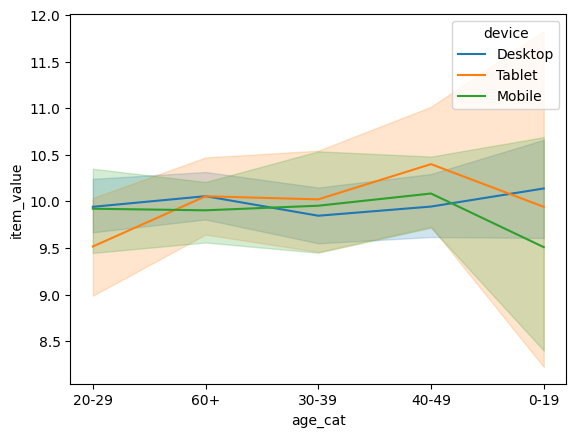

In [160]:
sns.lineplot(x="age_cat", y="item_value",
             hue="device",data=df_check1)

<Axes: xlabel='age_cat', ylabel='item_value'>

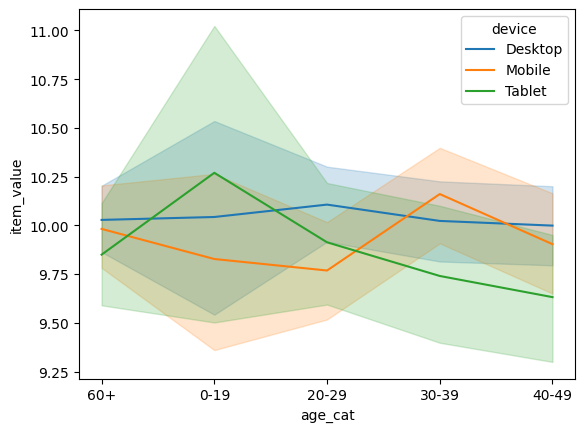

In [161]:
sns.lineplot(x="age_cat", y="item_value",
             hue="device",data=df_check0)

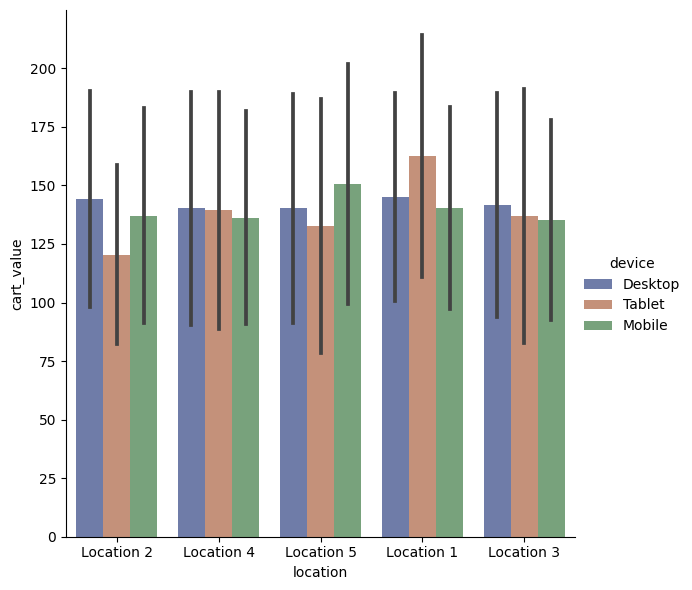

In [136]:
sns.catplot(
    data=df_check1, kind="bar",
    x="location", y="cart_value", hue="device",
    errorbar="sd", palette="dark", alpha=.6, height=6)

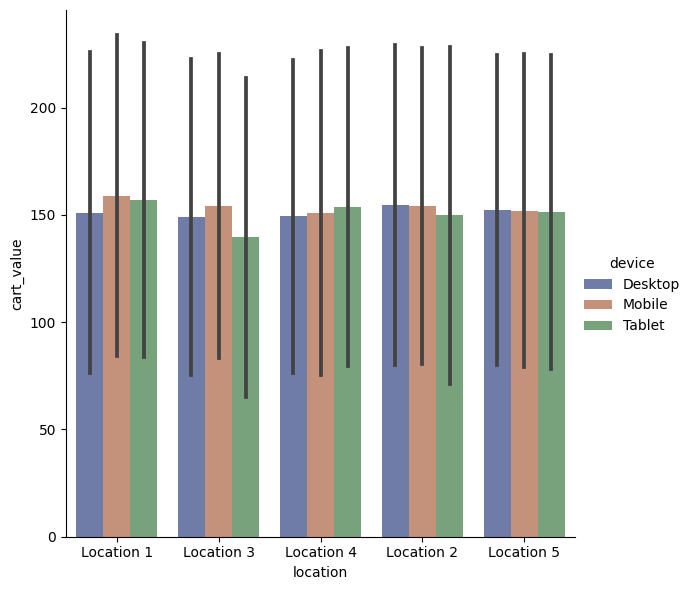

In [165]:
sns.catplot(
    data=df_check0, kind="bar",
    x="location", y="cart_value", hue="device",
    errorbar="sd", palette="dark", alpha=.6, height=6
)

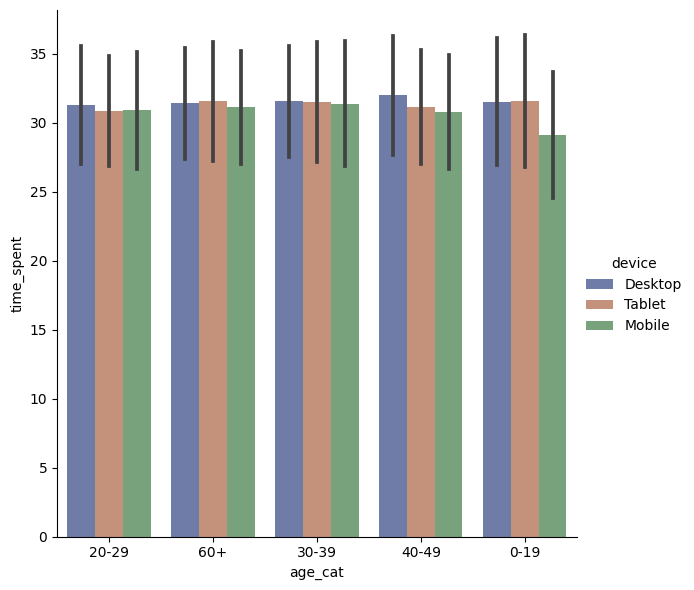

In [162]:
sns.catplot(
    data=df_check1, kind="bar",
    x="age_cat", y="time_spent", hue="device",
    errorbar="sd", palette="dark", alpha=.6, height=6)

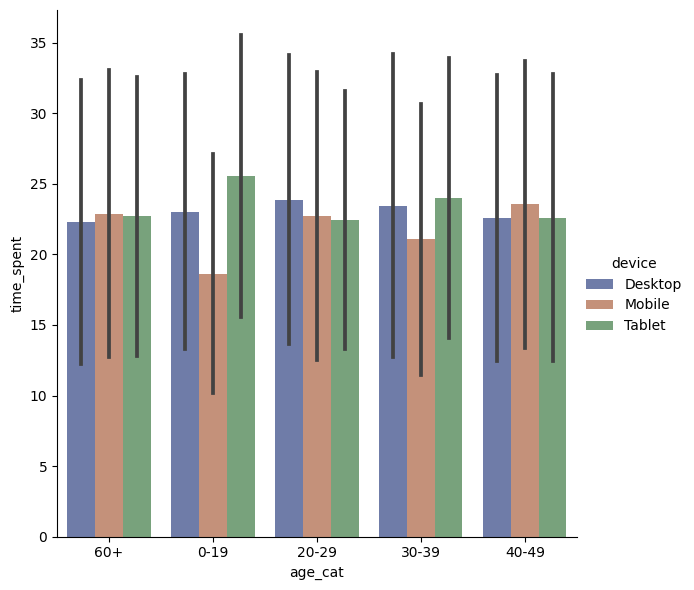

In [164]:
sns.catplot(
    data=df_check0, kind="bar",
    x="age_cat", y="time_spent", hue="device",
    errorbar="sd", palette="dark", alpha=.6, height=6)

<Axes: xlabel='device', ylabel='Count'>

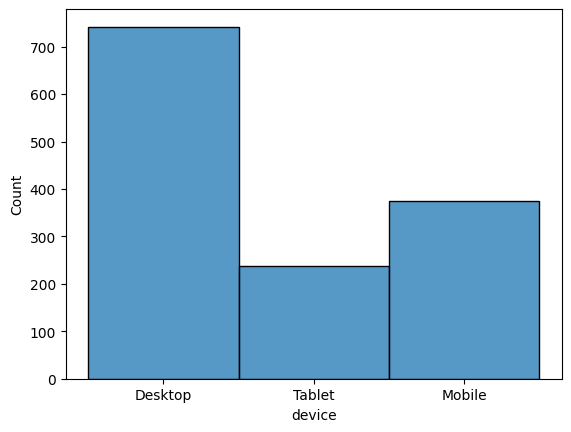

In [138]:
sns.histplot(df_check1['device'])

<Axes: xlabel='location', ylabel='Count'>

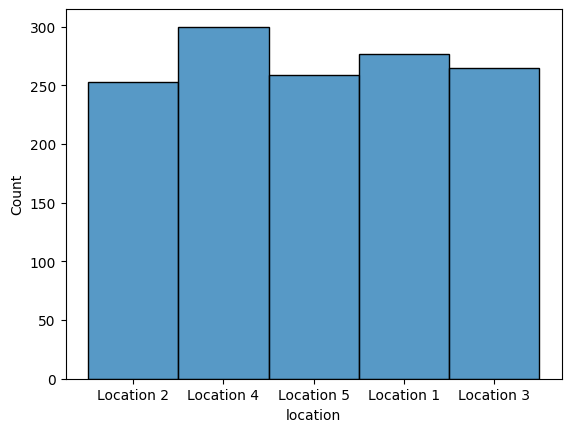

In [139]:
sns.histplot(df_check1['location'])

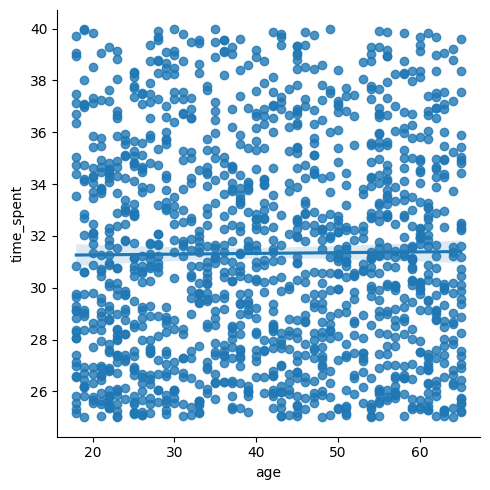

In [140]:
sns.lmplot(data = df_check1, x='age', y='time_spent')

<Axes: xlabel='age_cat'>

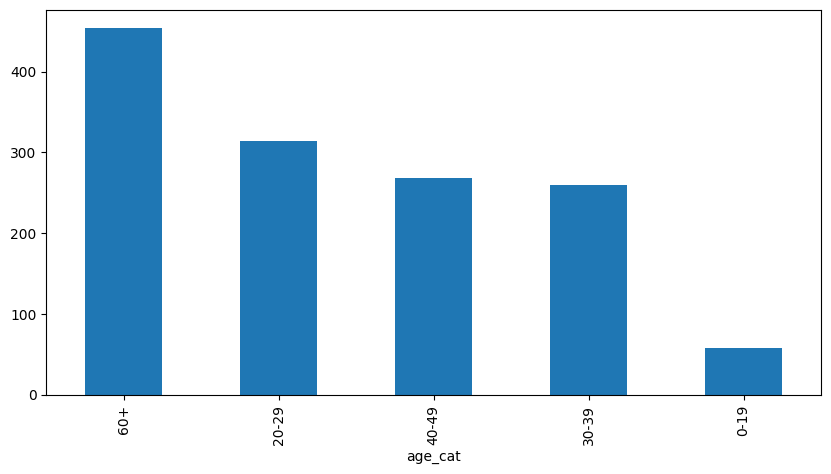

In [153]:
df_check1.groupby('age_cat')['time_spent'].count().sort_values(ascending=False).plot(kind='bar', figsize=(10,5))

<Axes: xlabel='age_cat'>

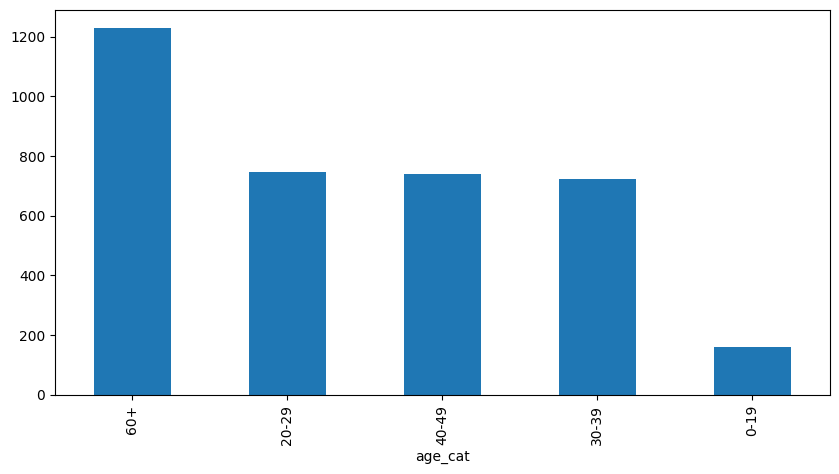

In [154]:
df_check0.groupby('age_cat')['time_spent'].count().sort_values(ascending=False).plot(kind='bar', figsize=(10,5))

<Axes: xlabel='device', ylabel='Count'>

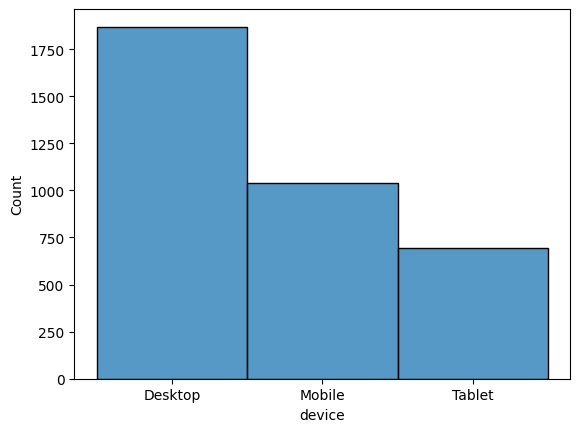

In [142]:
sns.histplot(df_check0['device'])

<Axes: xlabel='location', ylabel='Count'>

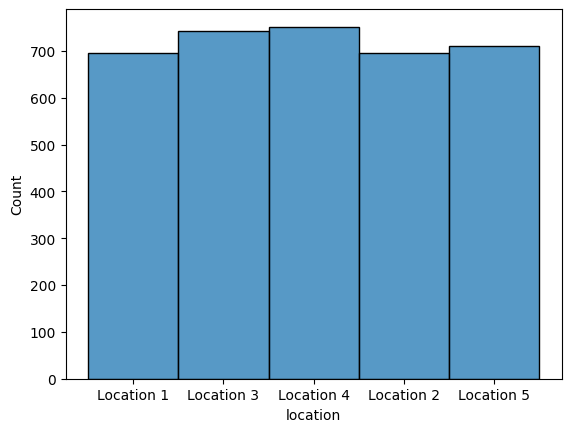

In [143]:
sns.histplot(df_check0['location'])

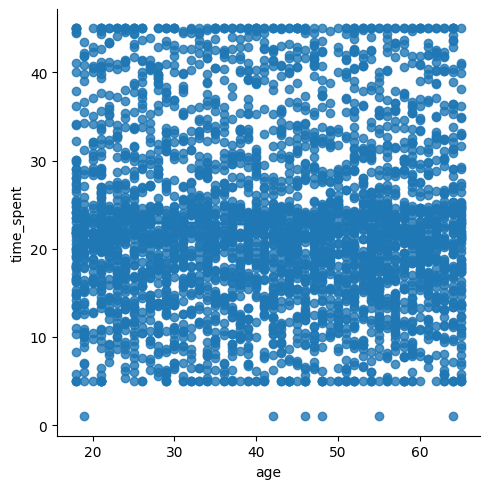

In [144]:
sns.lmplot(data = df_check0, x='age', y='time_spent')